[3, 2, 5, 8, 7, 6, 4, 9, 1]


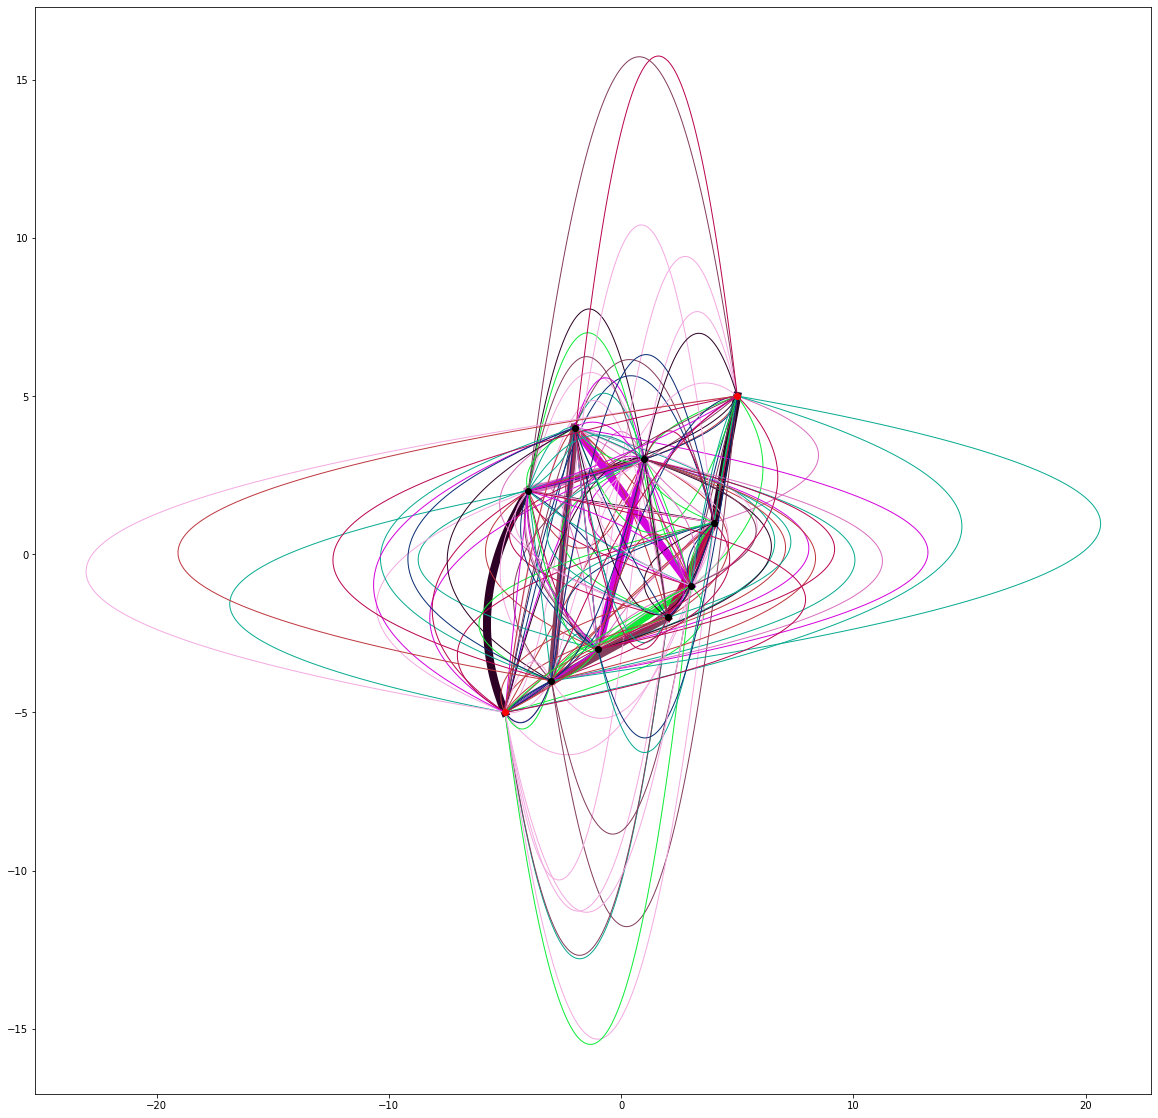

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from IPython.display import clear_output


# np.random.seed(1)
plt.figure(figsize=(20,20))

def length(a, b, x1, x2):
    def len_parabol(x, a, b):
        return (1 + (2*a*x + b)**2)**(1/2)
    out = quad(len_parabol, x1, x2, args=(a,b))[0]
    return np.abs(out)

def get_line(a, u, v):
    dim = 0 if np.random.rand() < 0.5 else 1
    A = np.array([[u[dim], 1], [v[dim], 1]])
    B = np.array([u[1-dim]-a*u[dim]**2, v[1-dim]-a*v[dim]**2])
    b, c = np.linalg.inv(A).dot(B)
    w = length(a, b, u[dim], v[dim])
    return b, c, w, dim

def draw_line(u, v, a, b, c, dim, color, linewidth=1):
    start, end = sorted([u[dim], v[dim]])
    x = np.linspace(start, end, 100)
    if dim == 0:
        plt.plot(x, a*x**2 + b*x + c, color=color, linewidth=linewidth)
#         if v[dim] == end:
#             plt.plot(x[-10], a*x[-10]**2 + b*x[-10] + c, color=color, marker='>')
#         else:
#             plt.plot(x[10], a*x[10]**2 + b*x[10] + c, color=color, marker='<')
    else:
        plt.plot(a*x**2 + b*x + c, x, color=color, linewidth=linewidth)
#         if v[dim] == end:
#             plt.plot(a*x[-10]**2 + b*x[-10] + c, x[-10], color=color, marker='^')
#         else:
#             plt.plot(a*x[10]**2 + b*x[10] + c, x[10], color=color, marker='v')
        
        

def gg2(N, D, num_edges):
    nodes = []
    edges = []
    edges_pt = []
    colors = [[np.random.rand() for _ in range(3)] for i in range(D)]
    choices_x = list(np.arange(-N//2+1,N//2))
    choices_y = list(np.arange(-N//2+1,N//2))
    choices_x.remove(0)
    choices_y.remove(0)
    nodes.append((-N//2, -N//2))
    nodes.append((N//2, N//2))
    best_path = []
    for _ in range(N-2):
        x = np.random.choice(choices_x)
        choices_x.remove(x)
        y = np.random.choice(choices_y)
        choices_y.remove(y)
        nodes.append((x, y))
        
    opt = list(range(2, N))
    np.random.shuffle(opt)
    opt.append(1)
    print(opt)
    chosen = opt[0]
    cur = chosen
    a = 0.1
    b, c, w, dim = get_line(a, nodes[0], nodes[chosen])
    d = np.random.randint(D)
    draw_line(nodes[0], nodes[chosen], a, b, c, dim, colors[d], linewidth=8)
    edges_pt.append((nodes[0], nodes[chosen], a, b, c, dim, d))
    best_path.append((nodes[0], nodes[chosen], a, b, c, dim, d))
    edges.append((0, chosen, d, w))
    for i in range(2, N):
        if i == chosen or i == 1:
            continue
        a = 0
        b, c, w, dim = get_line(a, nodes[0], nodes[i])
        d = np.random.randint(D)
        draw_line(nodes[0], nodes[i], a, b, c, dim, colors[d])
        edges_pt.append((nodes[0], nodes[i], a, b, c, dim, d))
        edges.append((0, i, d, w))
    
    for i in opt[1:]:
        a = 0
        b, c, w, dim = get_line(a, nodes[cur], nodes[i])
        d = np.random.randint(D)
        draw_line(nodes[cur], nodes[i], a, b, c, dim, colors[d], linewidth=8)
        edges_pt.append((nodes[cur], nodes[i], a, b, c, dim, d))
        edges.append((cur, i, d, w))
        cur = i
        if i == 1:
            break
    
    for e in range(num_edges):
#         try:
            i, j = np.random.choice(range(N), size=2, replace=False)
            a = np.random.rand() + 0.05
            a = a*-1 if np.random.rand() > 0.5 else a
            d = np.random.randint(D)
            u, v = nodes[i], nodes[j]
            b, c, w, dim = get_line(a, u, v)
            draw_line(u, v, a, b, c, dim, colors[d])
            edges_pt.append((u, v, a, b, c, dim, d))
            edges.append((i, j, d, w))
            
#         except:
#             break
    for idx, node in enumerate(nodes):
        c = 'k' if idx != 0 and idx != 1 else 'r'
        plt.plot(node[0], node[1], marker='o', color=c)
    
    return nodes, edges, edges_pt, colors
    

def gen_graph(N, D, num_edges):
    nodes = []
    choices_x = list(np.arange(-N//2+1,N//2))
    choices_y = list(np.arange(-N//2+1,N//2))
    choices_x.remove(0)
    choices_y.remove(0)
    nodes.append((-N//2, -N//2))
    nodes.append((N//2, N//2))
    for _ in range(N-2):
        x = np.random.choice(choices_x)
        choices_x.remove(x)
        y = np.random.choice(choices_y)
        choices_y.remove(y)
        nodes.append((x, y))

#     print(nodes)
    s, t = 0, 1 #np.random.choice(range(N), size=2, replace=False)
    edges = []
    edges_pt = []
    colors = [[np.random.rand() for _ in range(3)] for i in range(D)]
            
    for e in range(num_edges):
#         try:
            i, j = np.random.choice(range(N), size=2, replace=False)
            if np.random.rand() > 0.01 or i in (0, 1) or j in (0, 1):
                a = np.random.randint(num_edges//N//2, num_edges//N)/(num_edges//N*10) if np.random.rand() > 0.5 else np.random.randint(-num_edges//N, -num_edges//N//2)/(num_edges//N*10)
            else:
                a = np.random.randint(-num_edges//N//2, num_edges//N//2)/(num_edges//N*10)
            d = np.random.randint(D)
            u, v = nodes[i], nodes[j]
            b, c, w, dim = get_line(a, u, v)
            draw_line(u, v, a, b, c, dim, colors[d])
            edges_pt.append((u, v, a, b, c, dim, d))
            edges.append((i, j, d, w))
            
#         except:
#             break
    for idx, node in enumerate(nodes):
        c = 'k' if idx != 0 and idx != 1 else 'r'
        plt.plot(node[0], node[1], marker='o', color=c)
    return nodes, edges, edges_pt, colors

N = 10
D = 10
s = 1
t = 2
num_edges = 200
# nodes, edges, edges_pt, colors = gen_graph(N, D, num_edges)
nodes, edges, edges_pt, colors = gg2(N, D, num_edges)

In [525]:
print(length(0.1, 3, 1, 9))

32.99728020091994


In [8]:
def draw_graph(nodes, edges_pt, path, colors):
    clear_output(wait=True)
    plt.figure(figsize=(20,20))
    path.print()
    print(path.cost)
    for u, v, a, b, c, dim, d in edges_pt:
        draw_line(u, v, a, b, c, dim, colors[d])
    for edge in path.edges:
        u, v, a, b, c, dim, d = edges_pt[edge.idx]
        draw_line(u, v, a, b, c, dim, colors[d], linewidth=8)
        
    for idx, node in enumerate(nodes):
        c = 'k' if idx != 0 and idx != 1 else 'r'
        plt.plot(node[0], node[1], marker='o', color=c)
            
        

In [4]:
ant = Ant3(graph)

draw_graph(nodes, edges_pt, ant.move(), colors)

NameError: name 'Ant3' is not defined

In [9]:
class Egde_IDPC(object):
    def __init__(self,u, v, w, d, idx):
        super(Egde_IDPC, self).__init__()
        self.idx = idx
        self.u = u
        self.v = v
        self.w = w
        self.d = d
        self.pheromone = 1
        self.ants = []
        #self.color = COLORS[d]
        
    def update_pheromone(self, pheromone_evaporation):
        self.pheromone = (1-pheromone_evaporation)*self.pheromone
        for ant in self.ants:
            self.pheromone += pheromone_const*ant.tour_complete
        self.ants = []
    def print(self):
        print('({}->{}), color: {}, cost: {}'.format(self.u, self.v, self.d, self.w))

class Graph_IDPC():
    def __init__(self, N, D, s, t):
        self.N = N
        self.D = D
        self.s = s
        self.t = t
        self.edges = [[[] for v in range(N+1)] for u in range(N+1)]

    def print(self):
        for u in range(N+1):
            for v in range(N+1):
                print('({}->{})'.format(u, v))
                for edge in self.edges[u][v]:
                    print('color: {}, cost: {}'.format(edge.d, edge.w))

graph = Graph_IDPC(N, D, s, t)
check = []
max_w = 0
for idx, (u, v, d, w )in enumerate(edges):
    u += 1
    v += 1
    if w > max_w:
        max_w = w
    found = False
    for edge in graph.edges[u][v]:
        if edge.d == d:
            found = True
            if edge.w > w:
                edge.w = w
            break
    if not found:
        graph.edges[u][v].append(Egde_IDPC(u, v, w, d, idx))

print('number of nodes:', N)
print('number of domains:', D)
print('start node:', graph.s)
print('terminate node:', graph.t)
print('max weight:', max_w)

number of nodes: 10
number of domains: 10
start node: 1
terminate node: 2
max weight: 47.9452759026693


(1->7), color: 6, cost: 2.23606797749979
(7->2), color: 4, cost: 12.258991793019831
(14.495059770519621, 0)


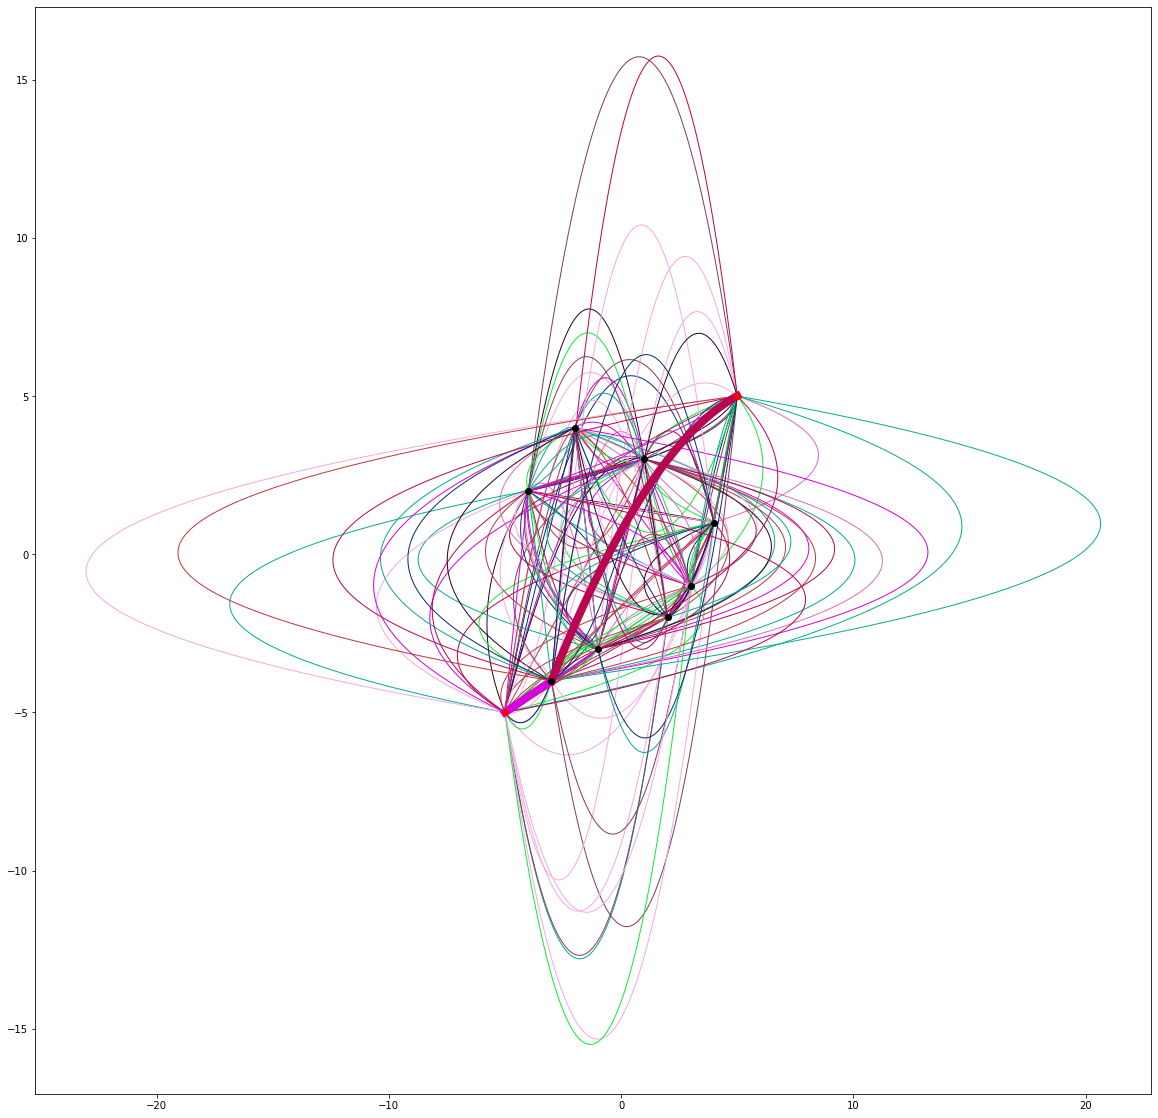

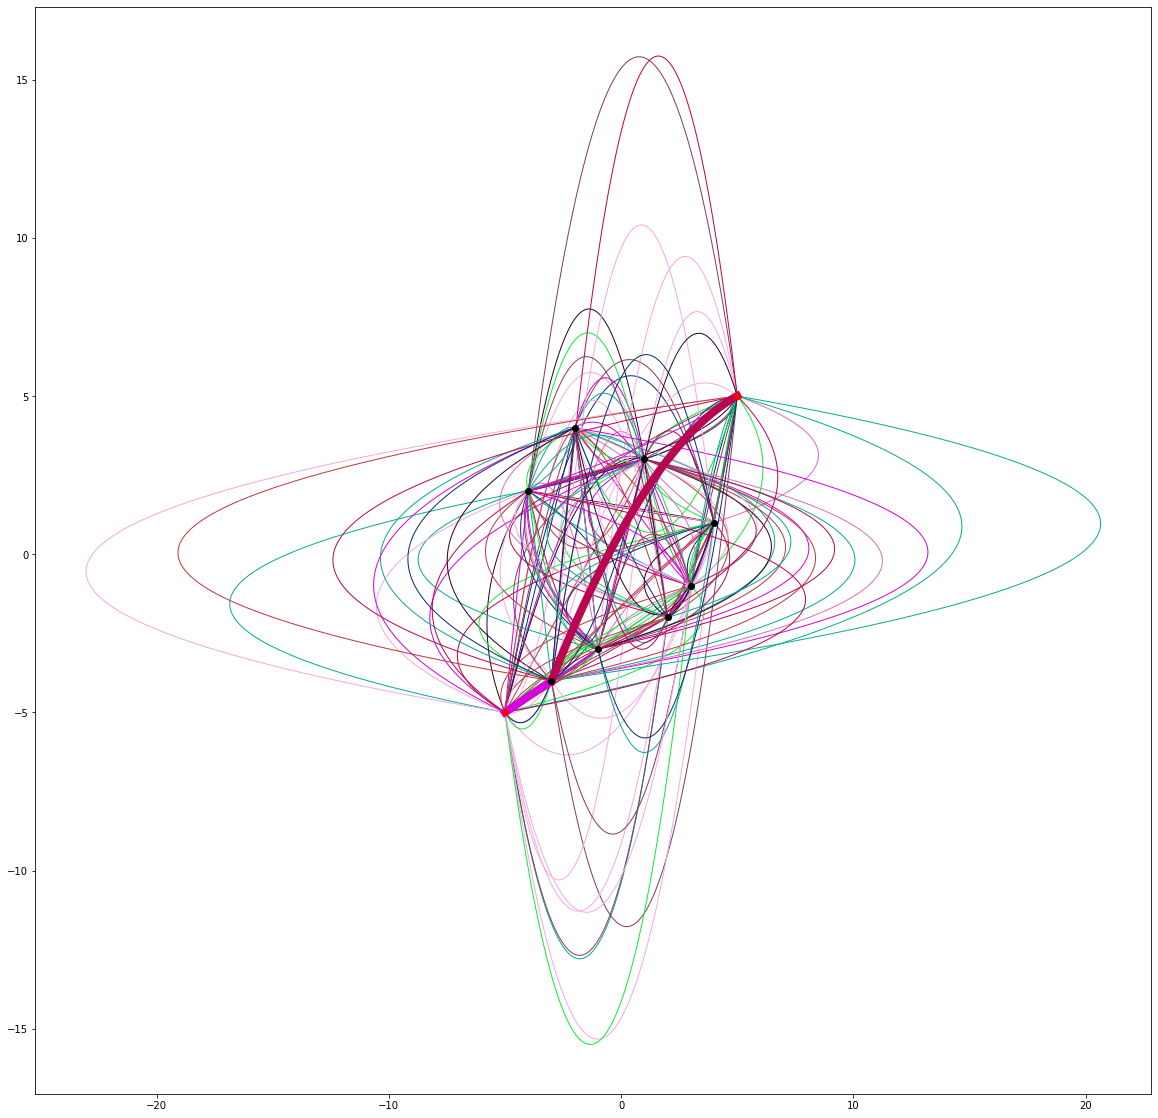

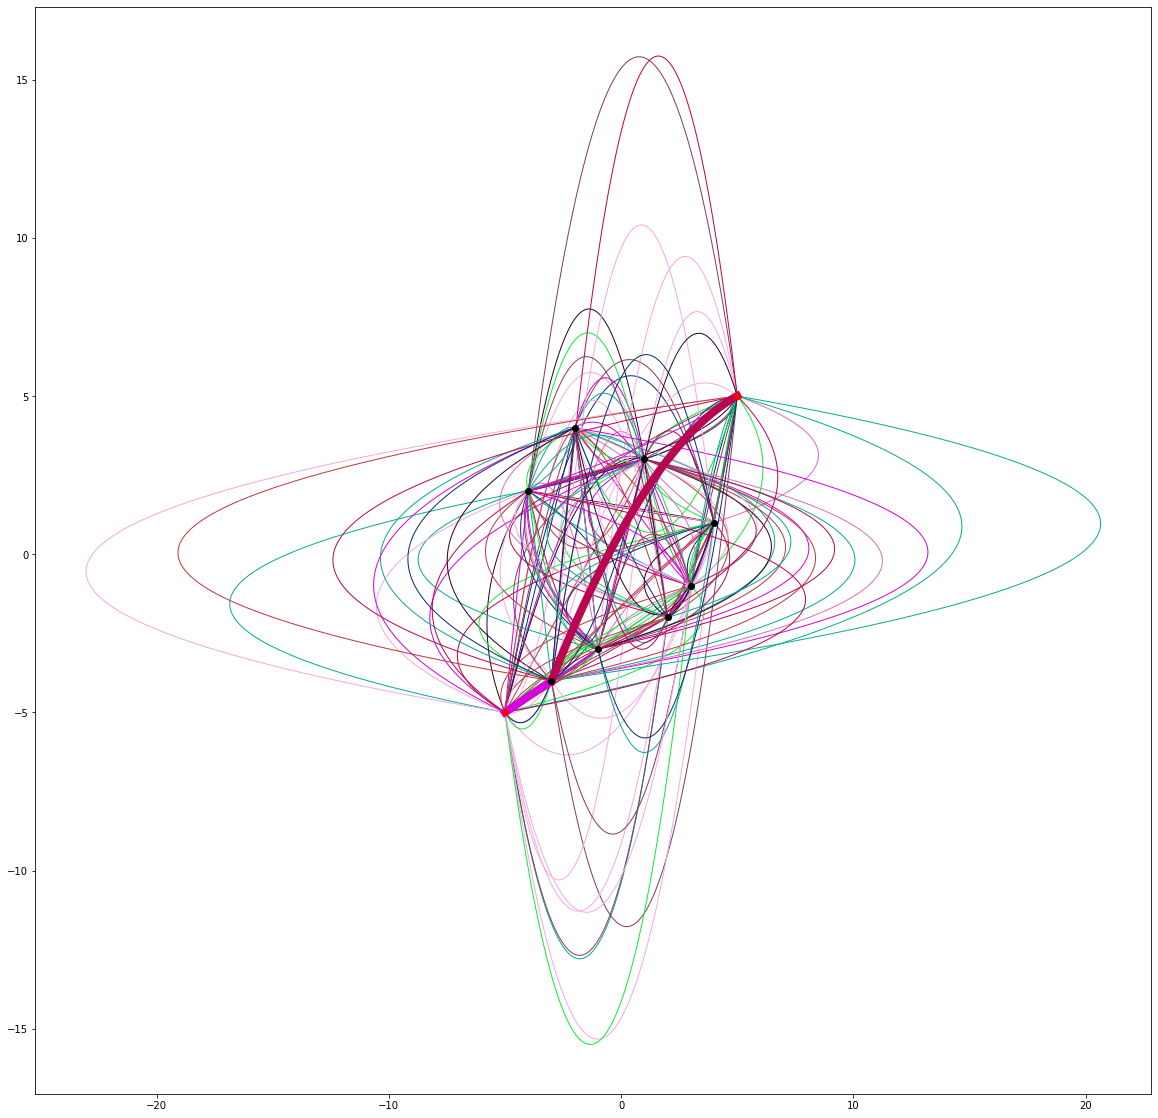

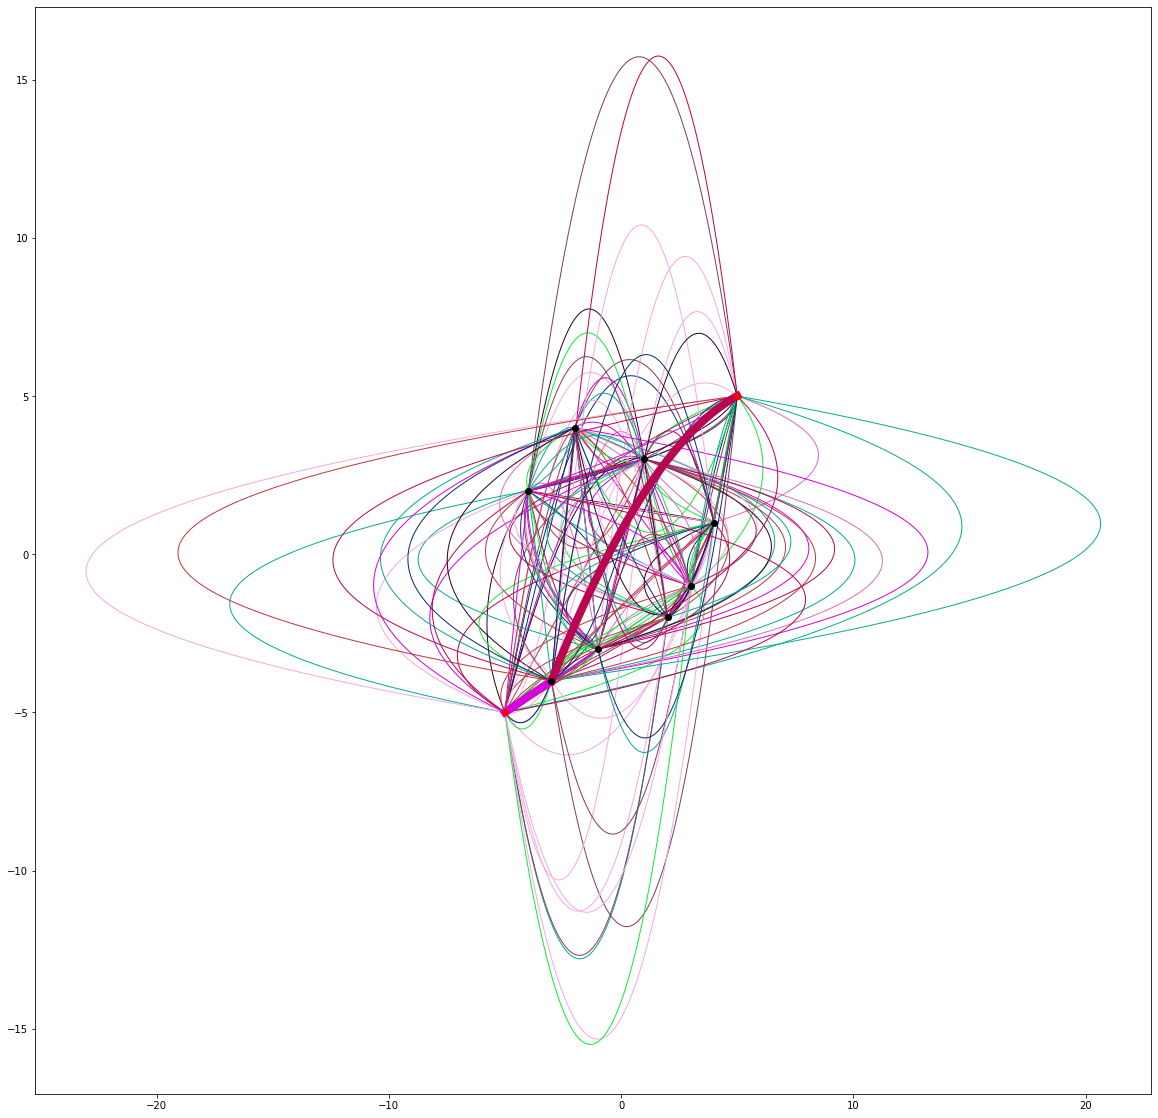

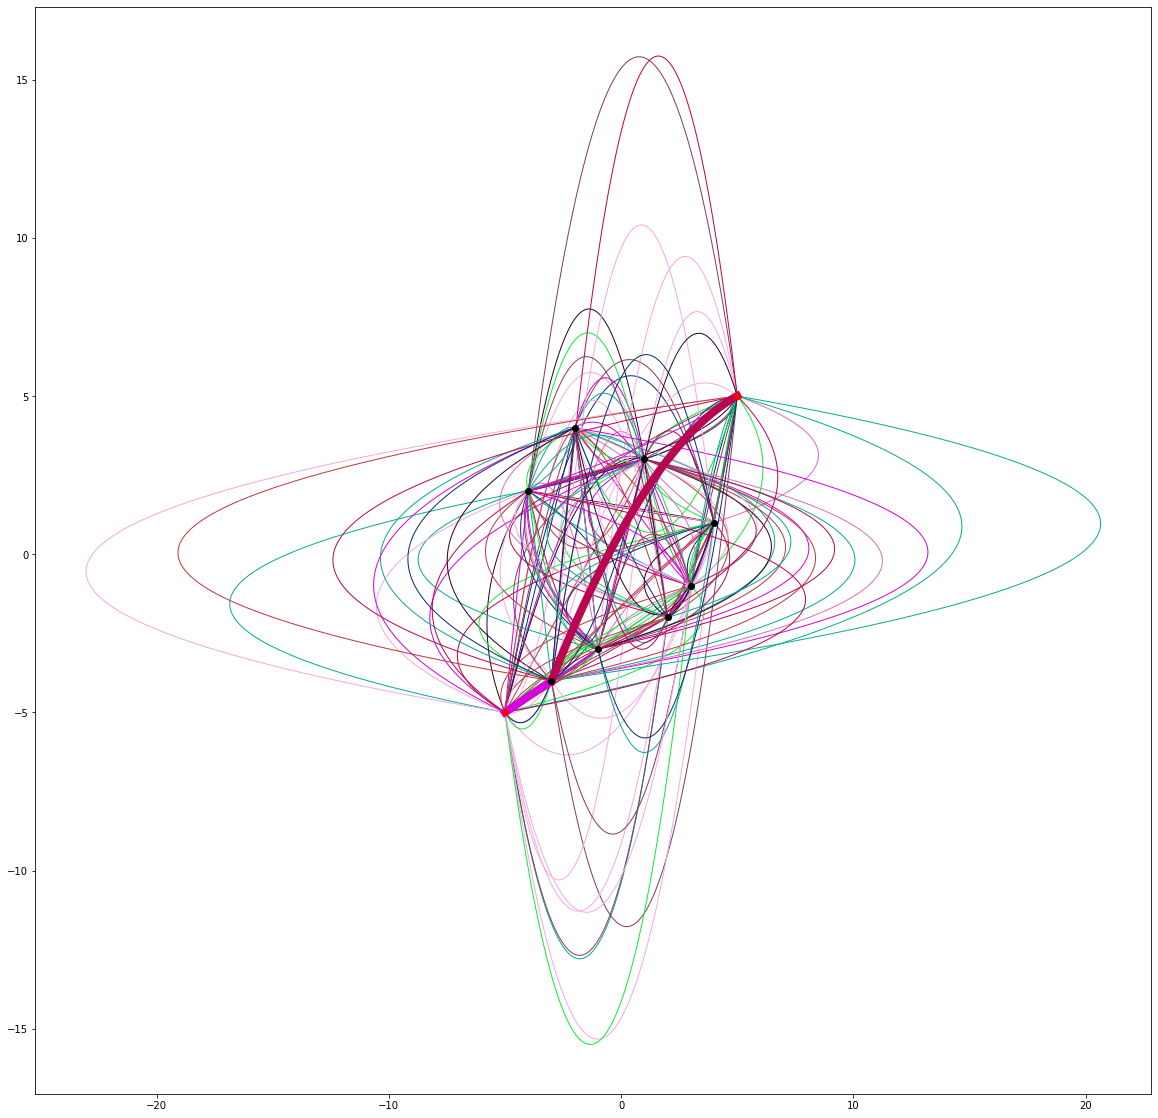

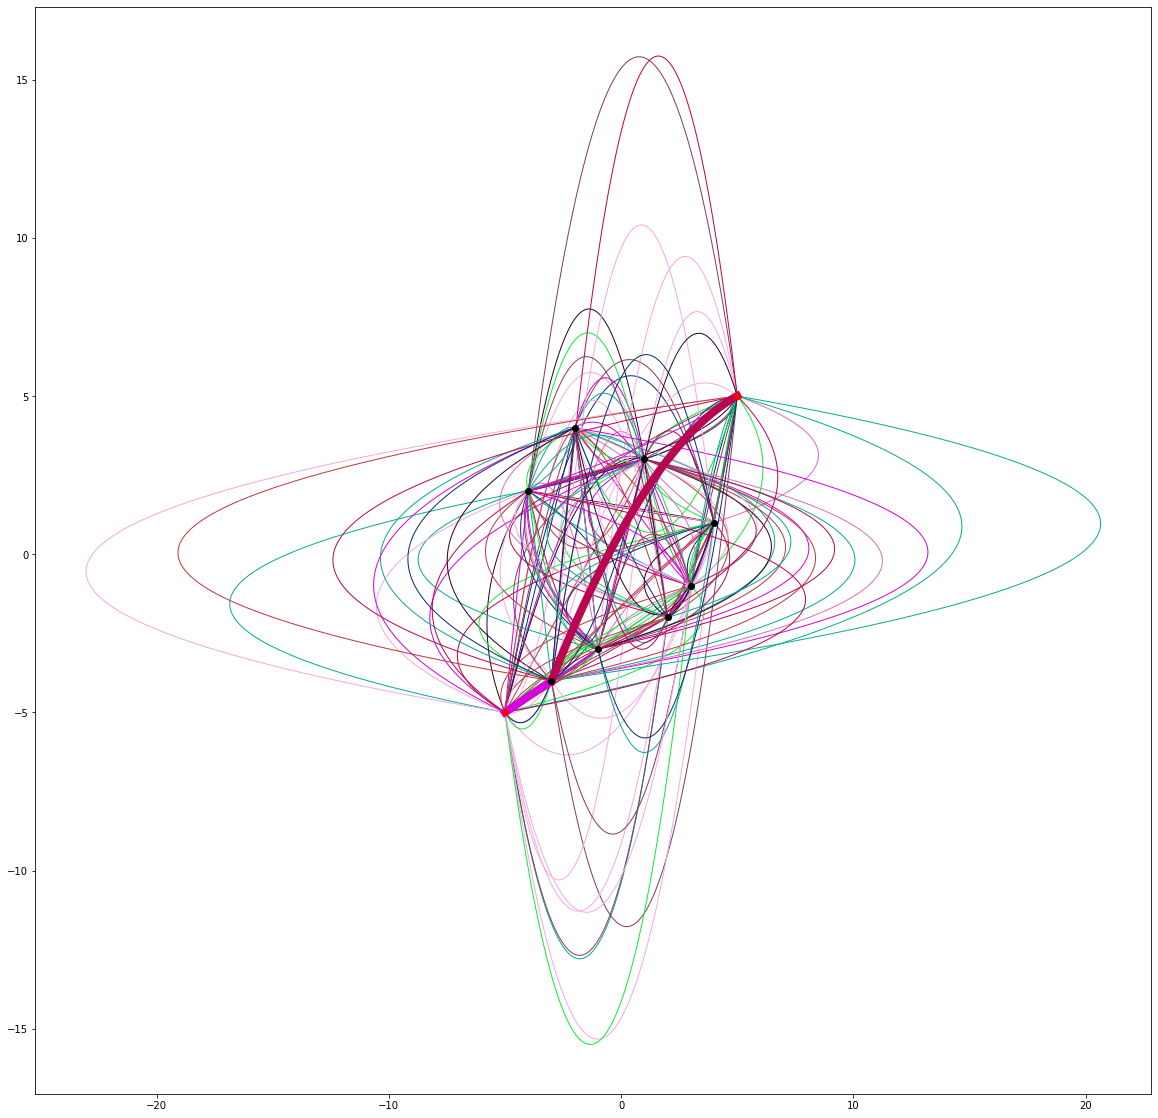

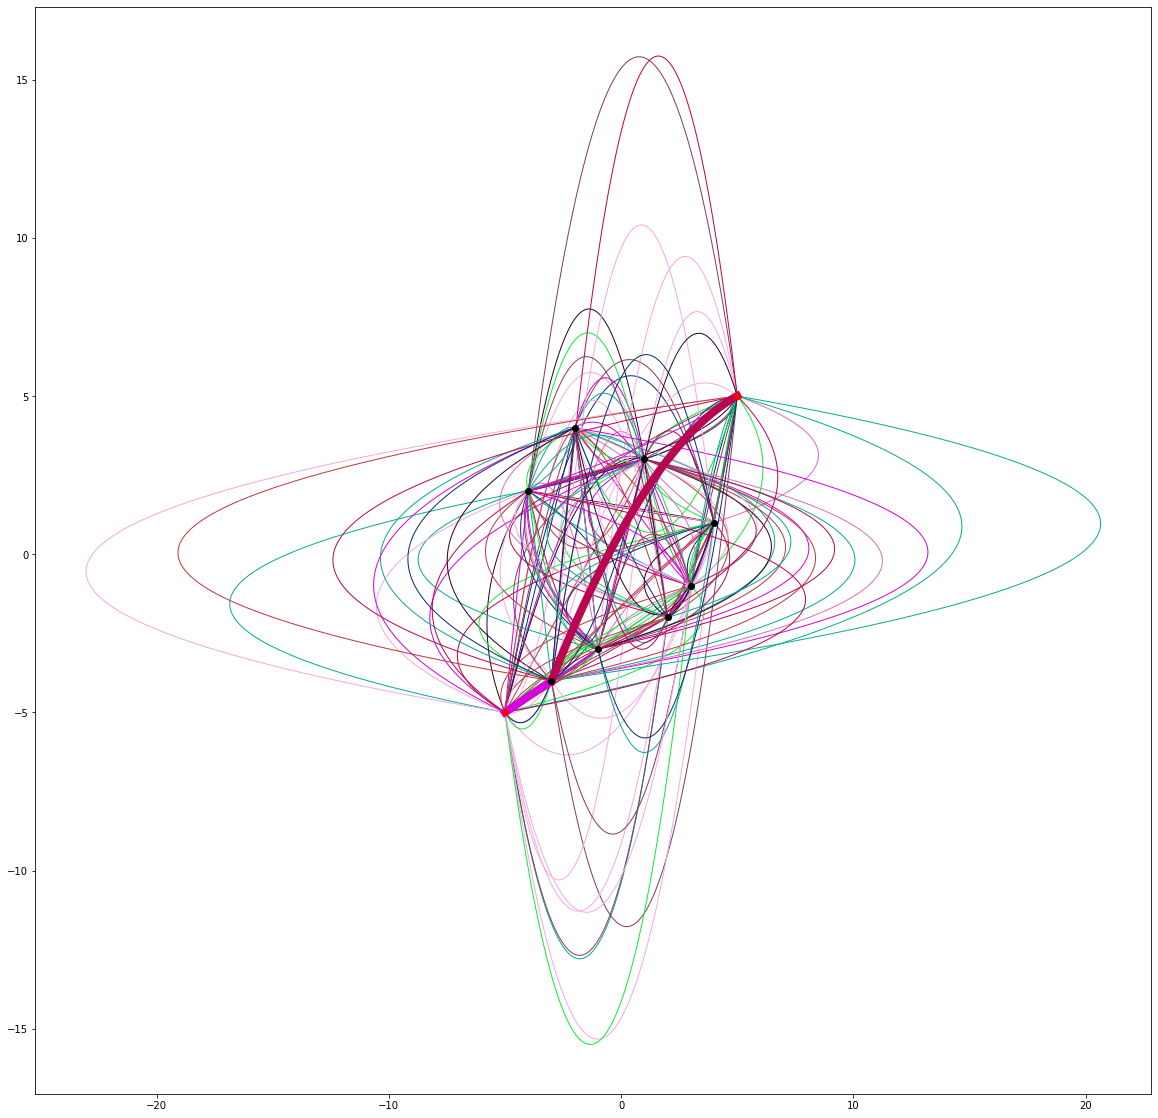

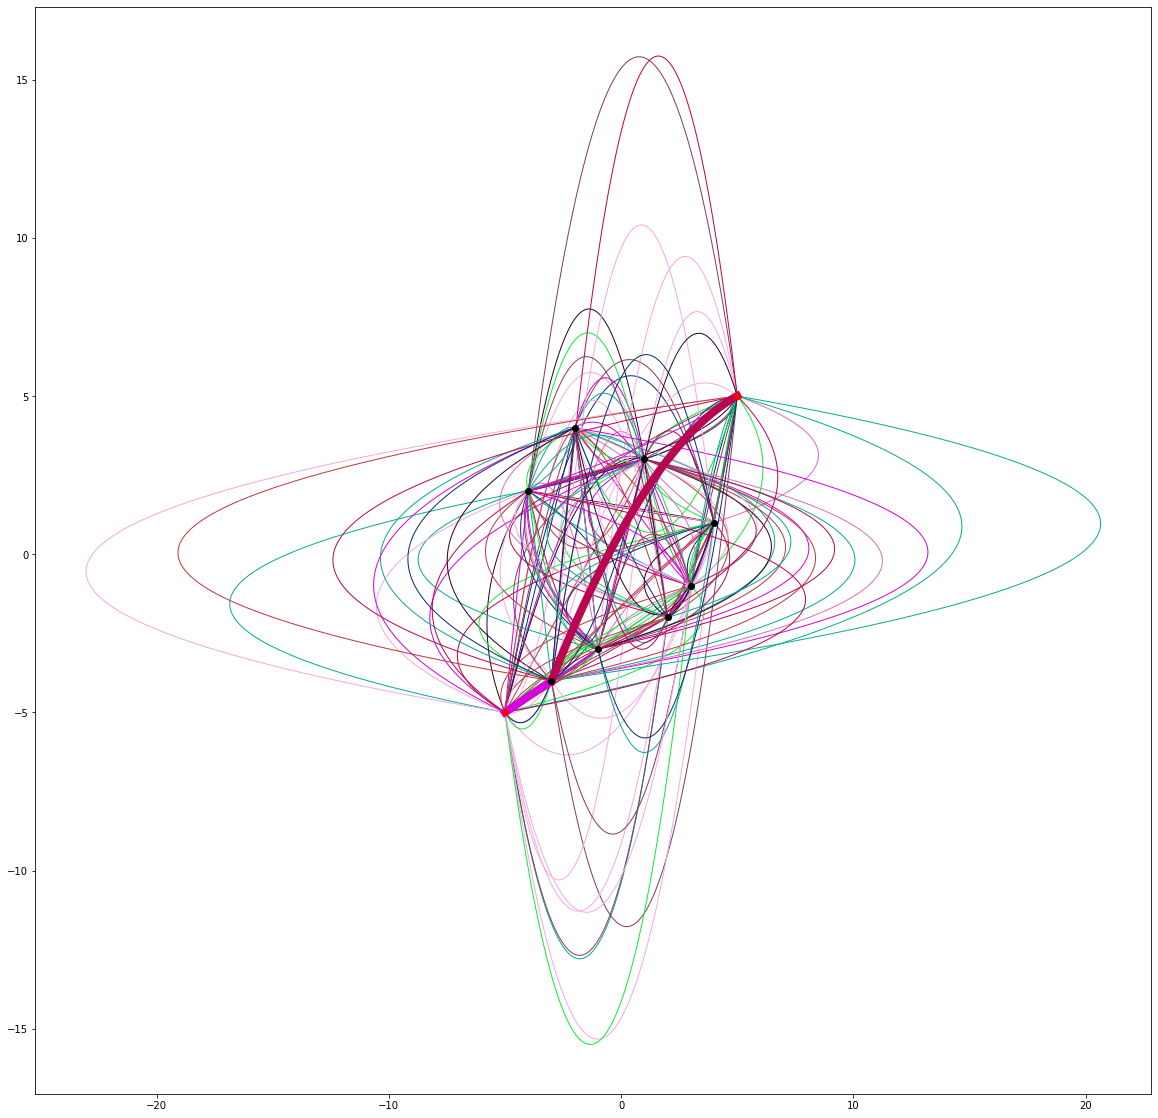

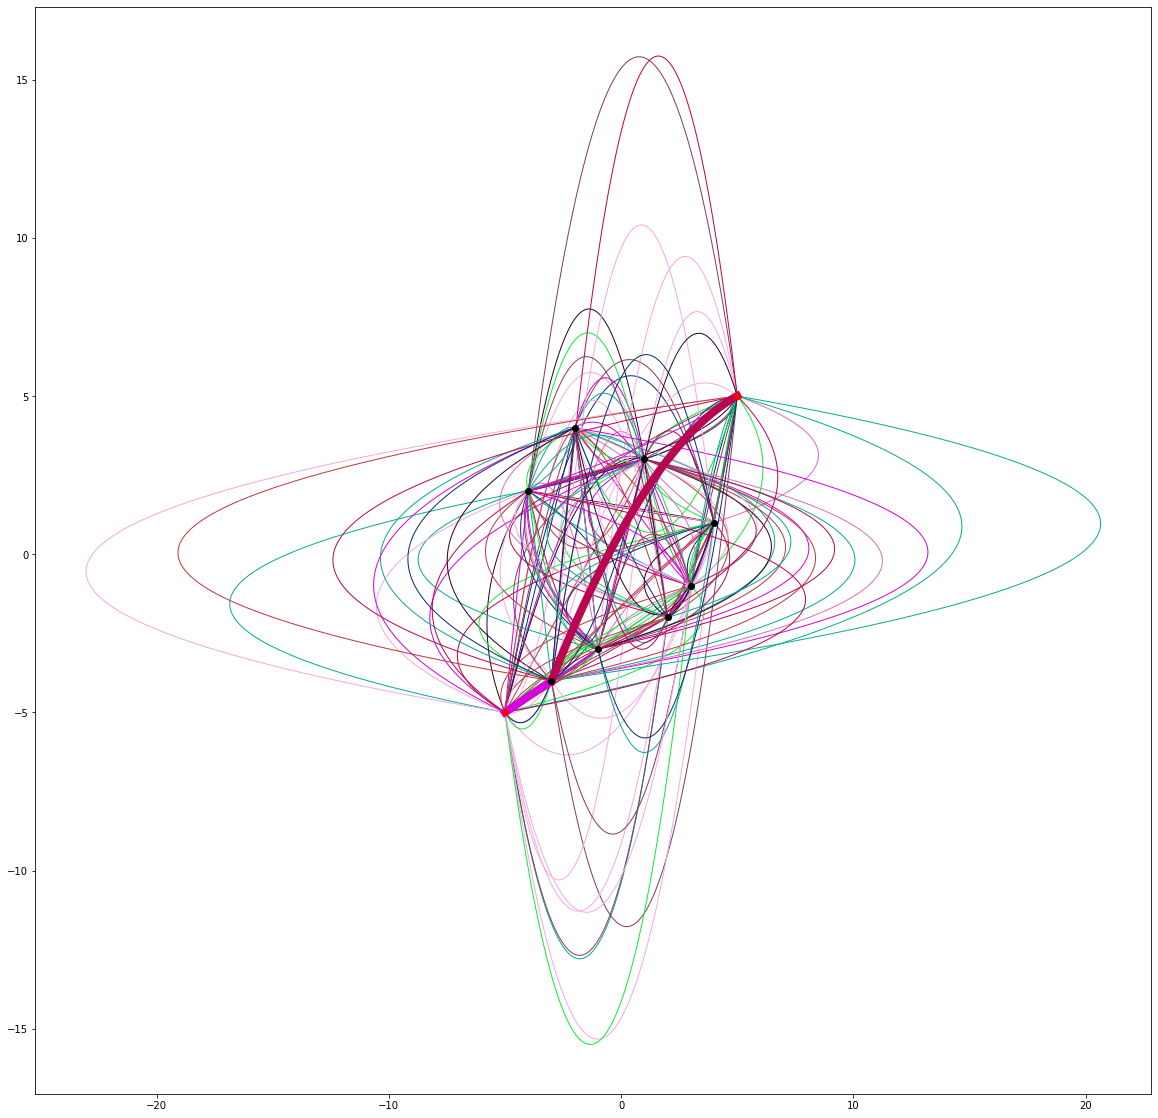

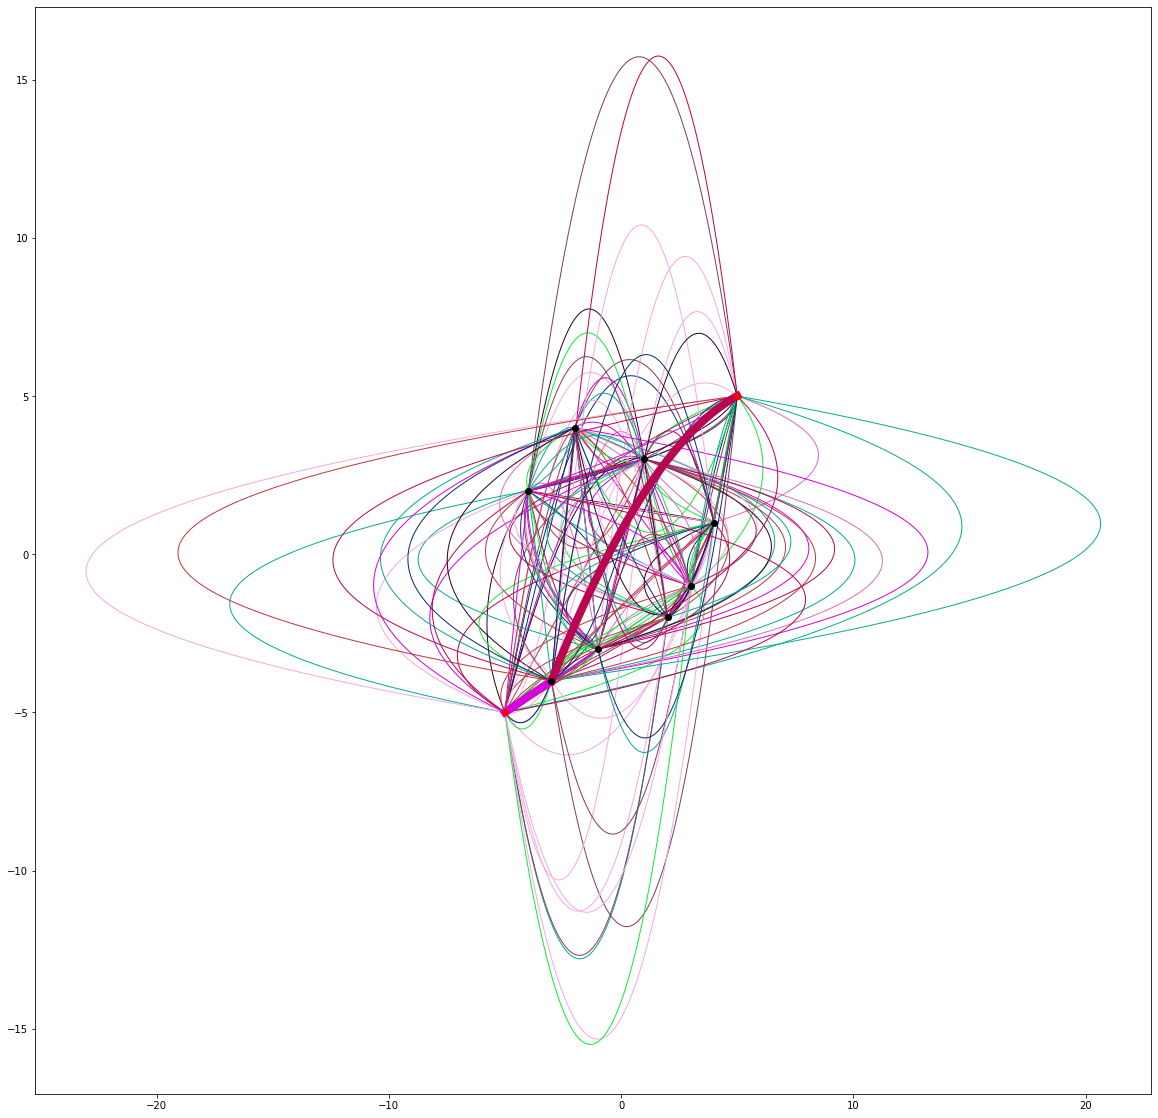

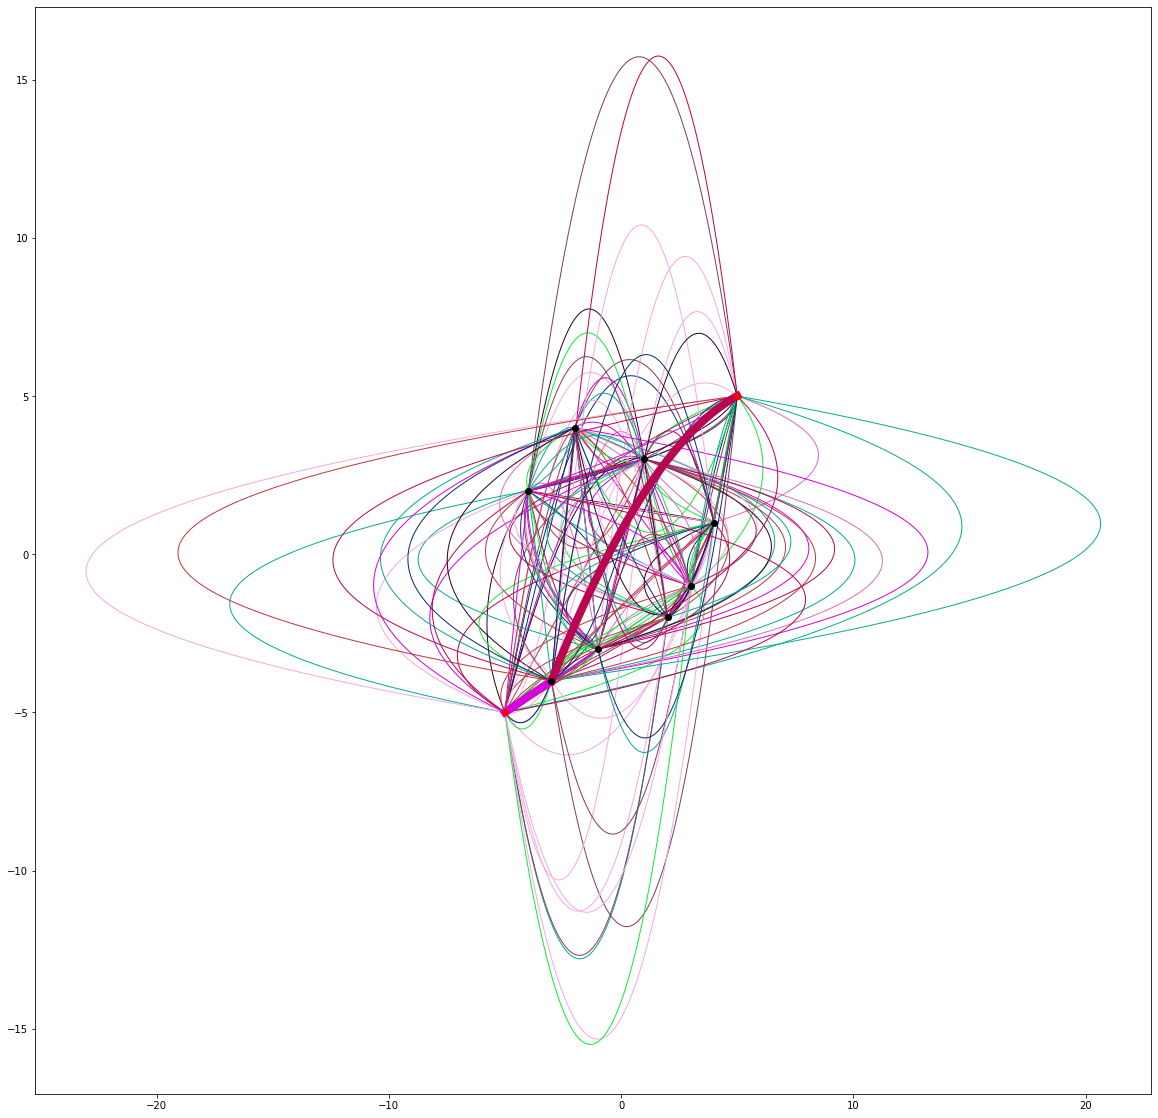

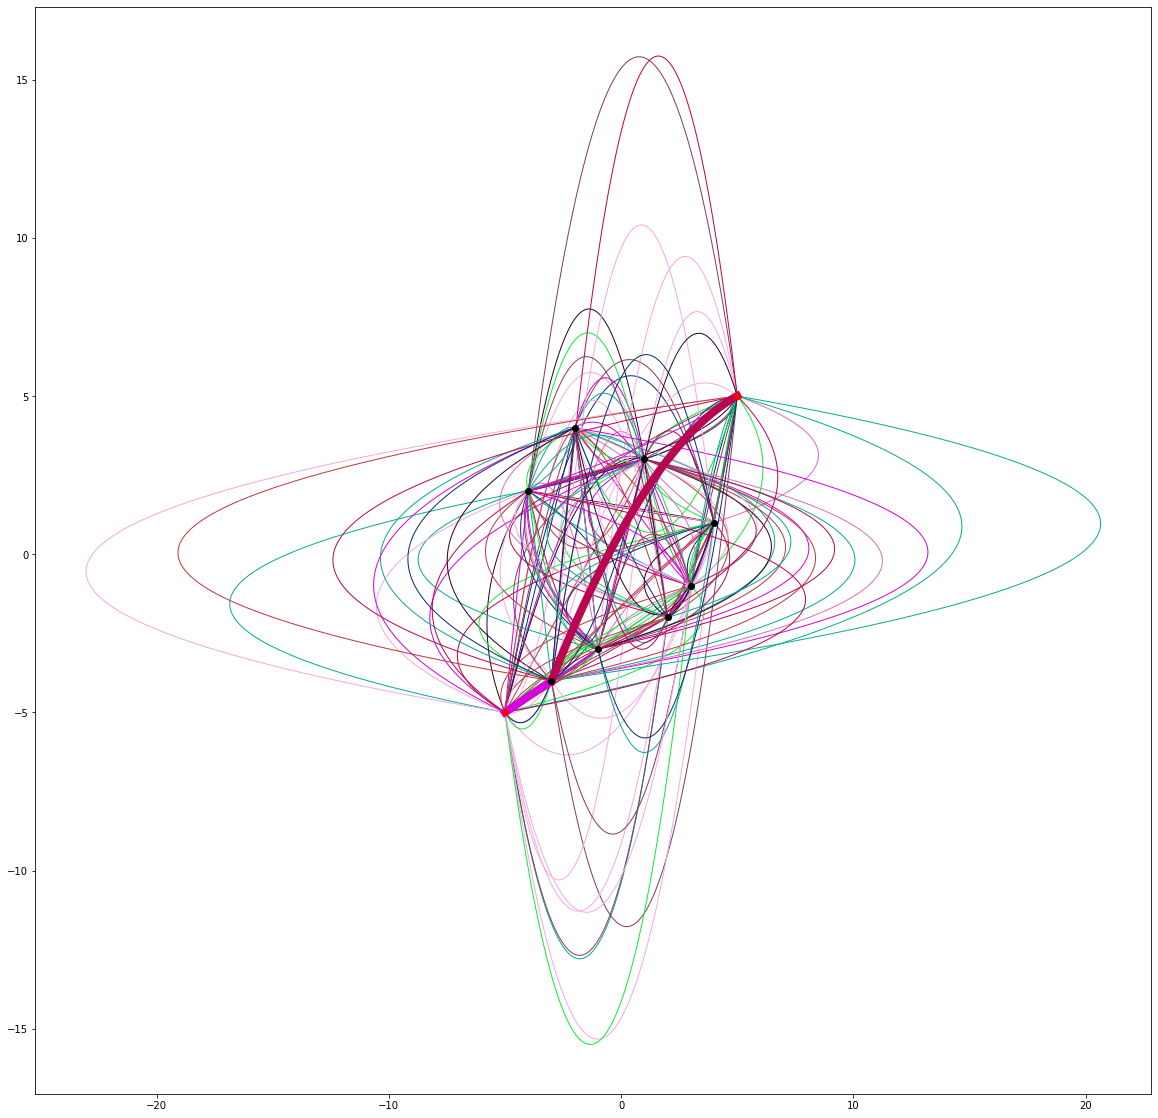

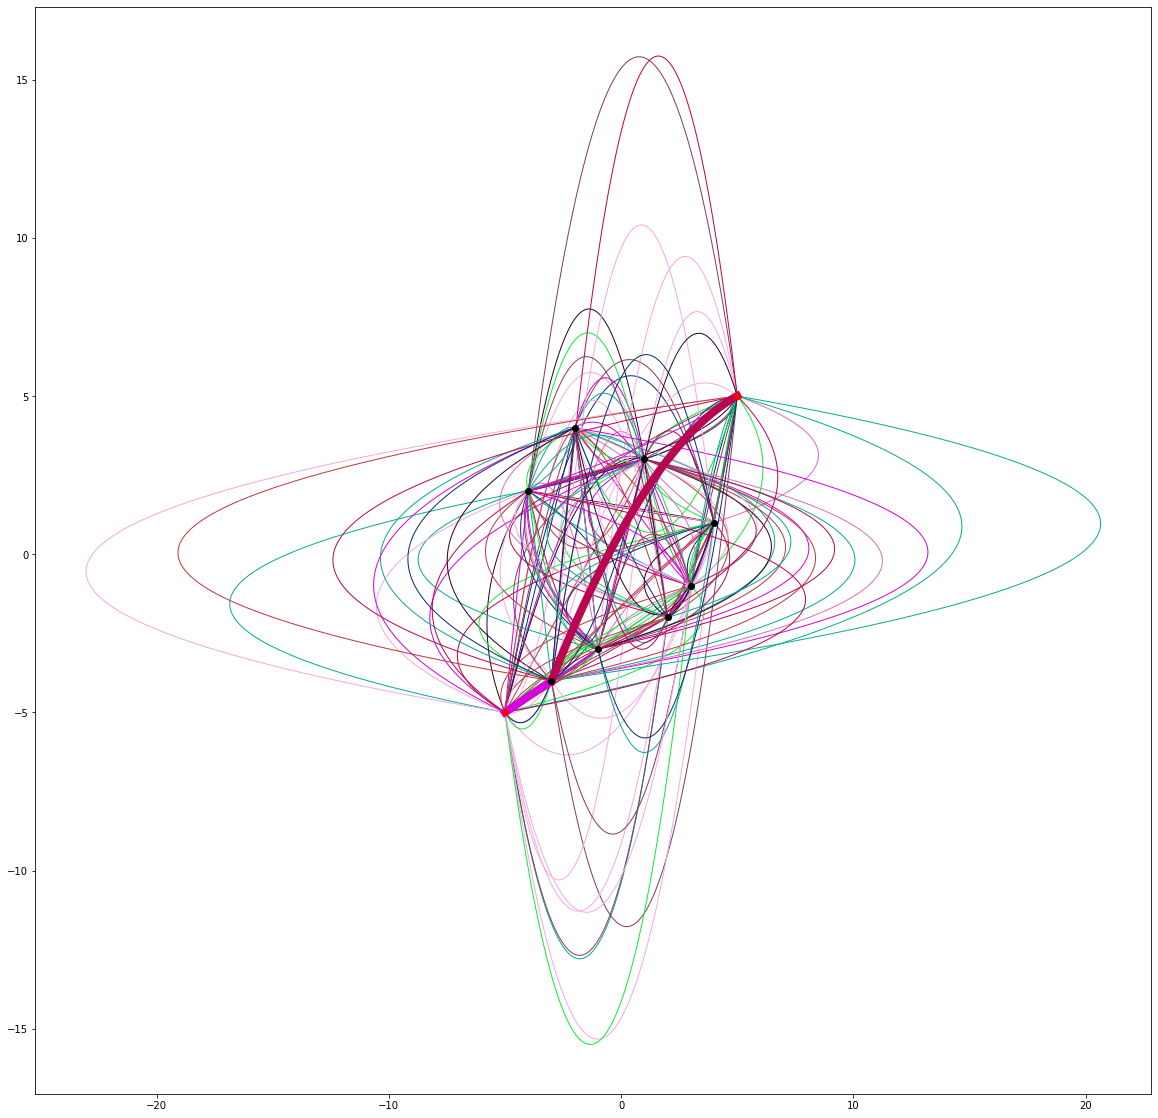

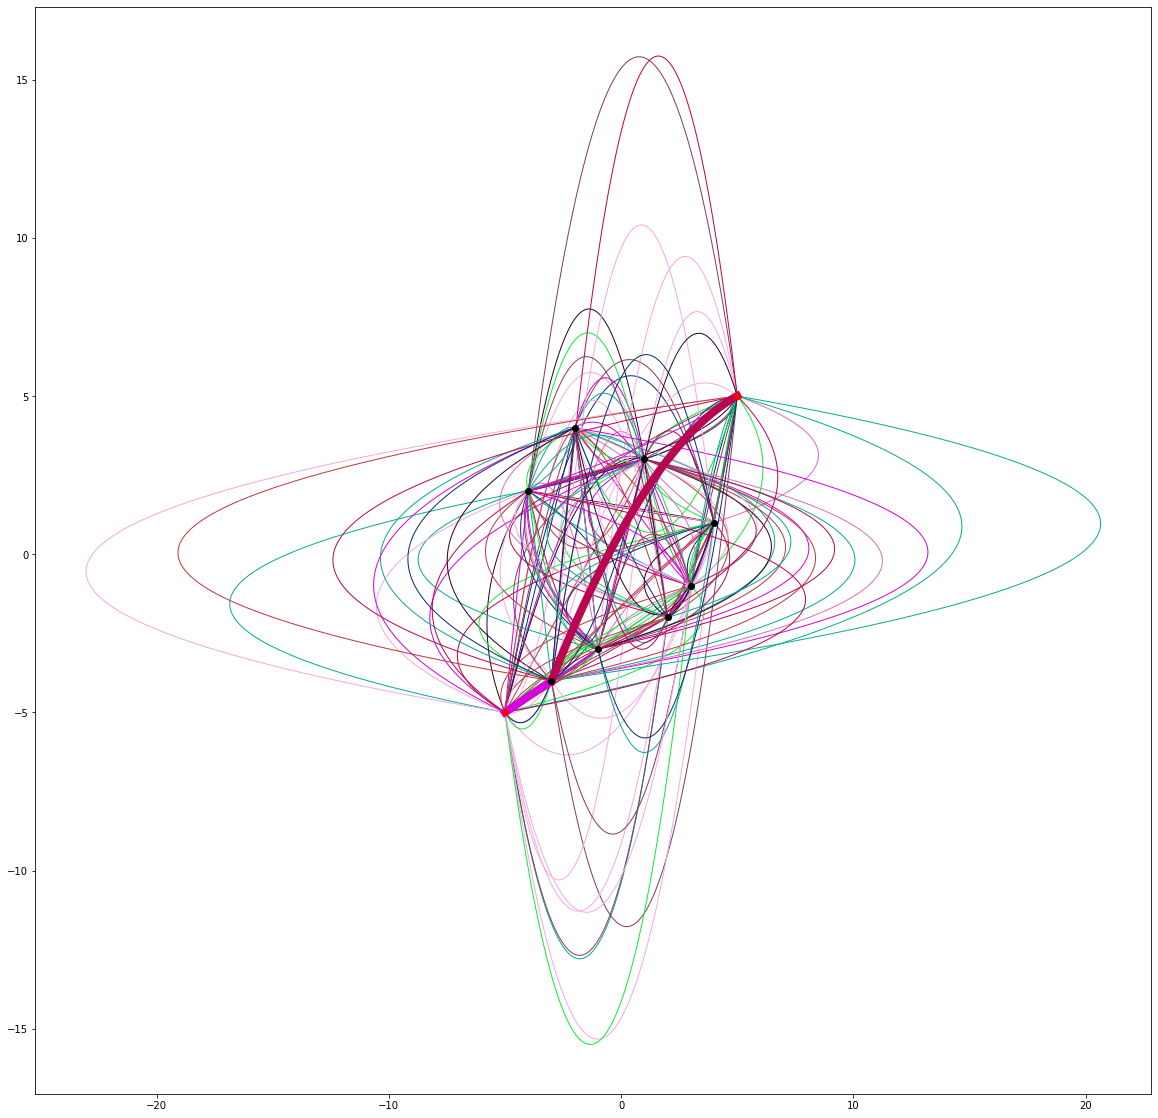

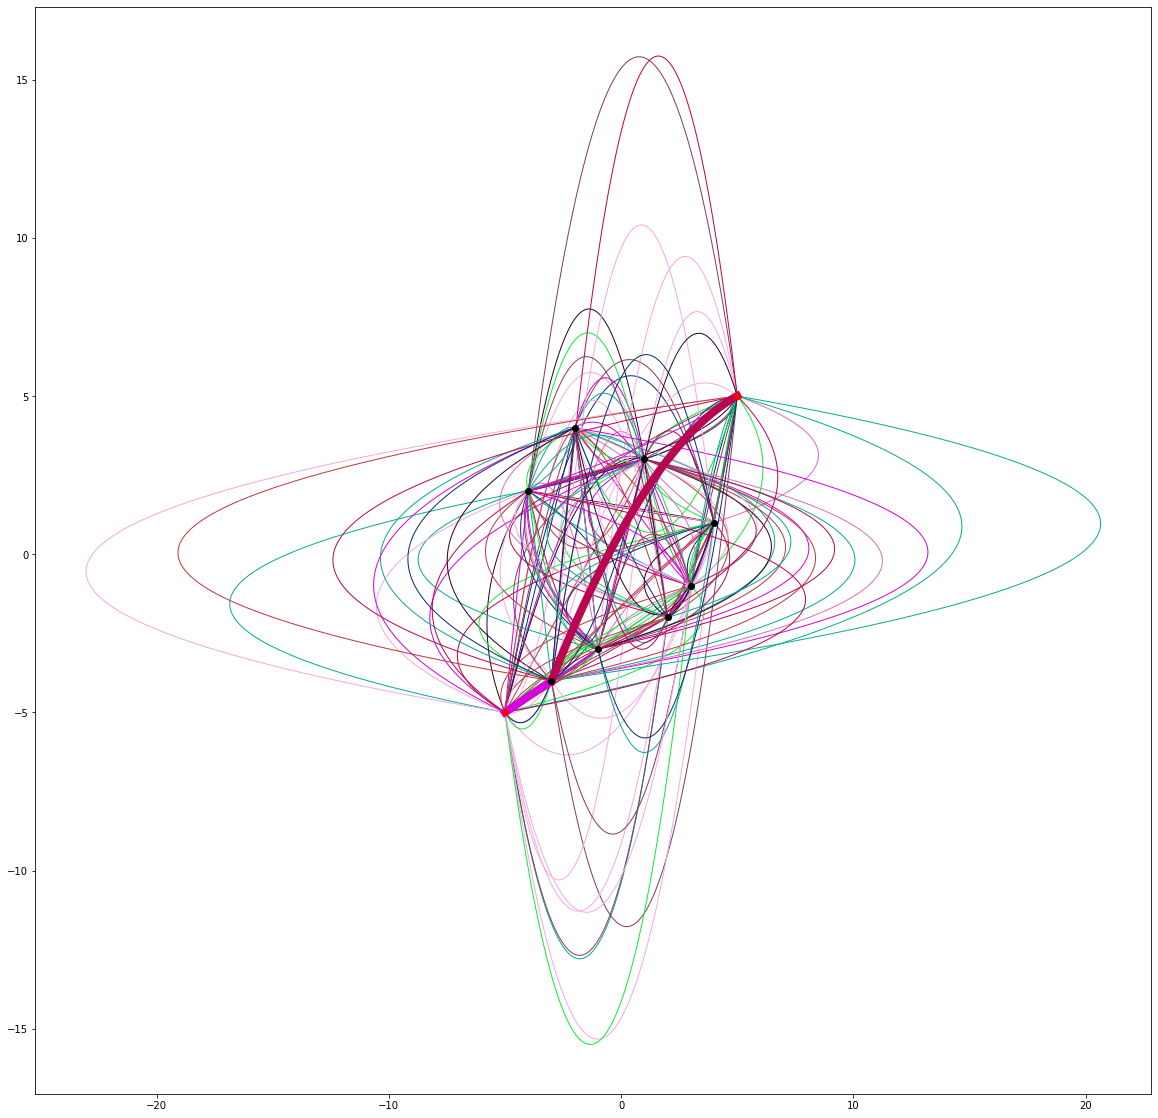

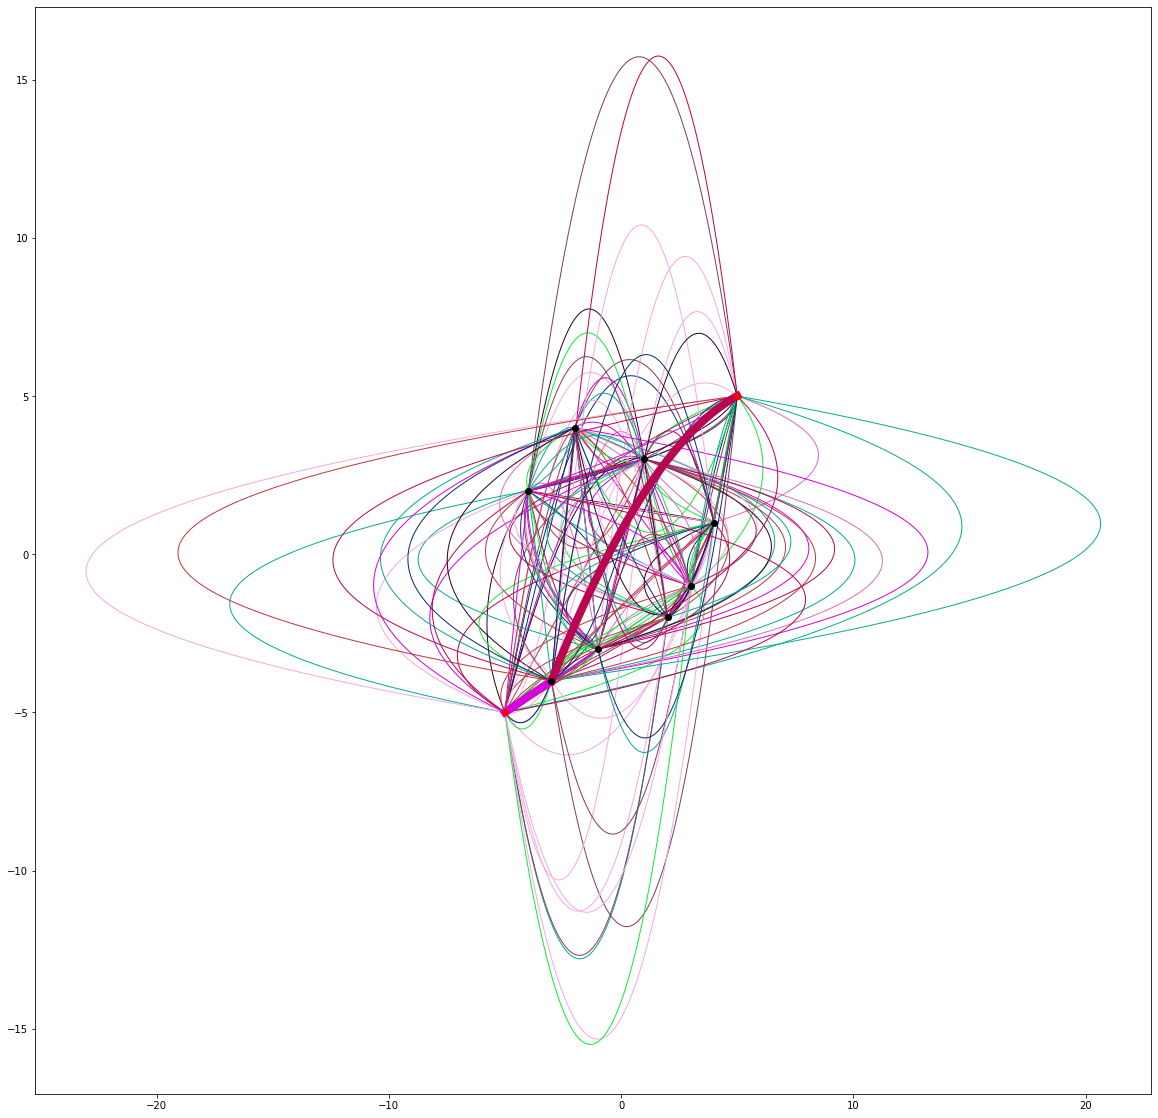

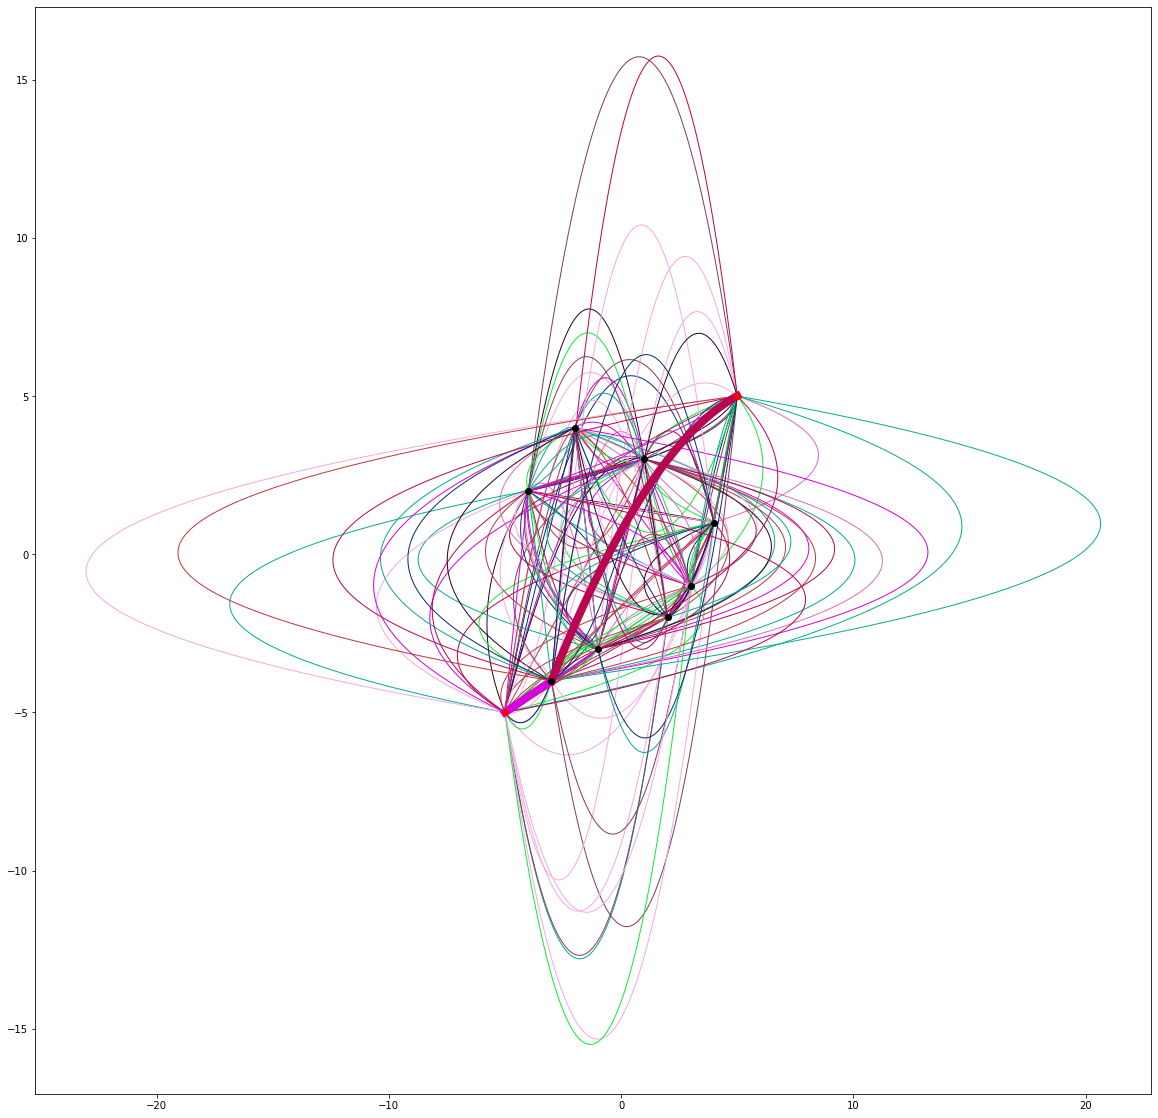

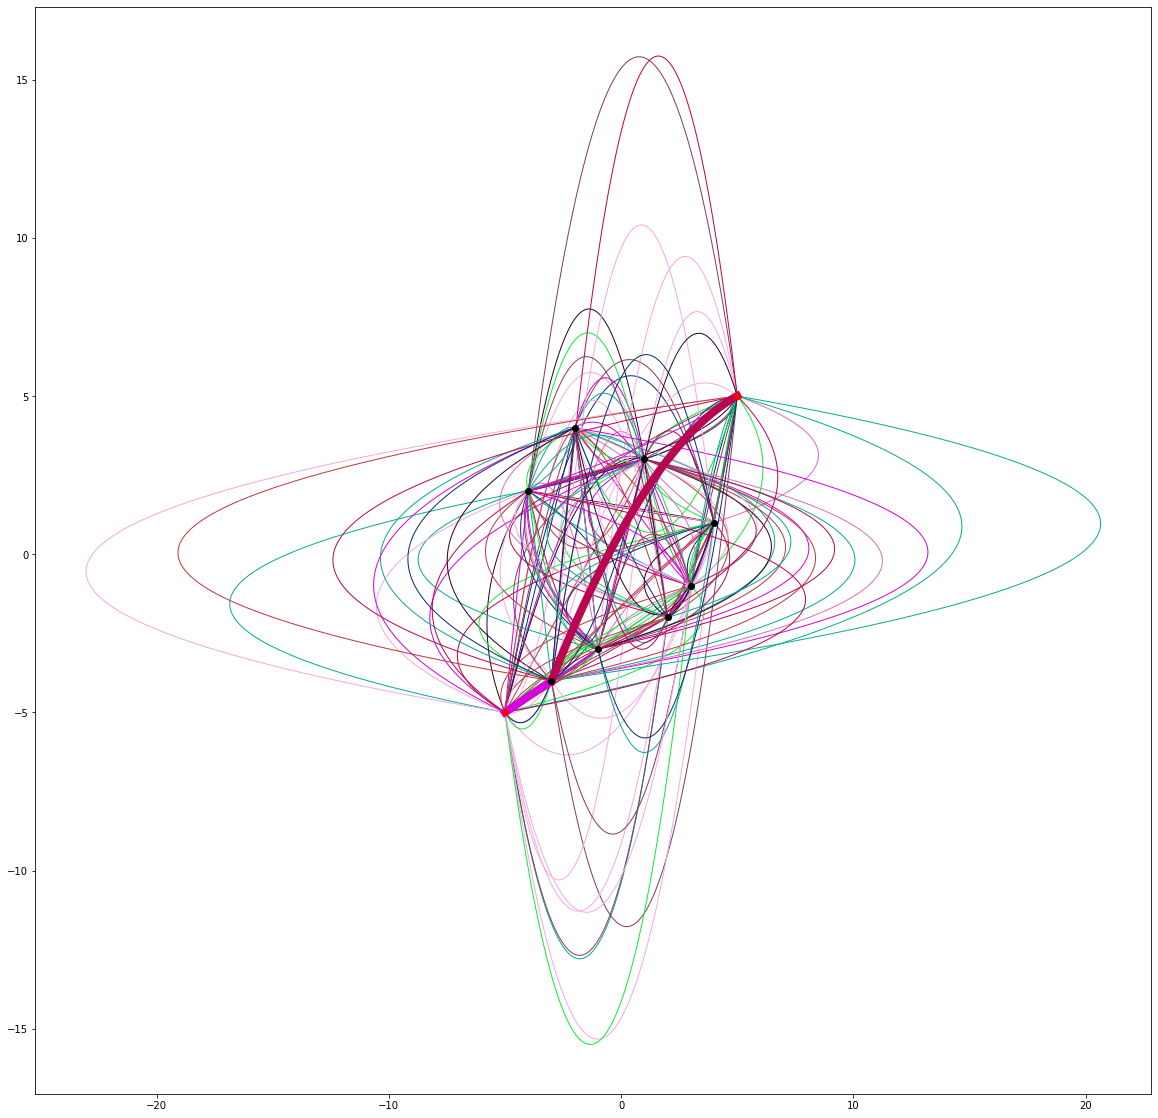

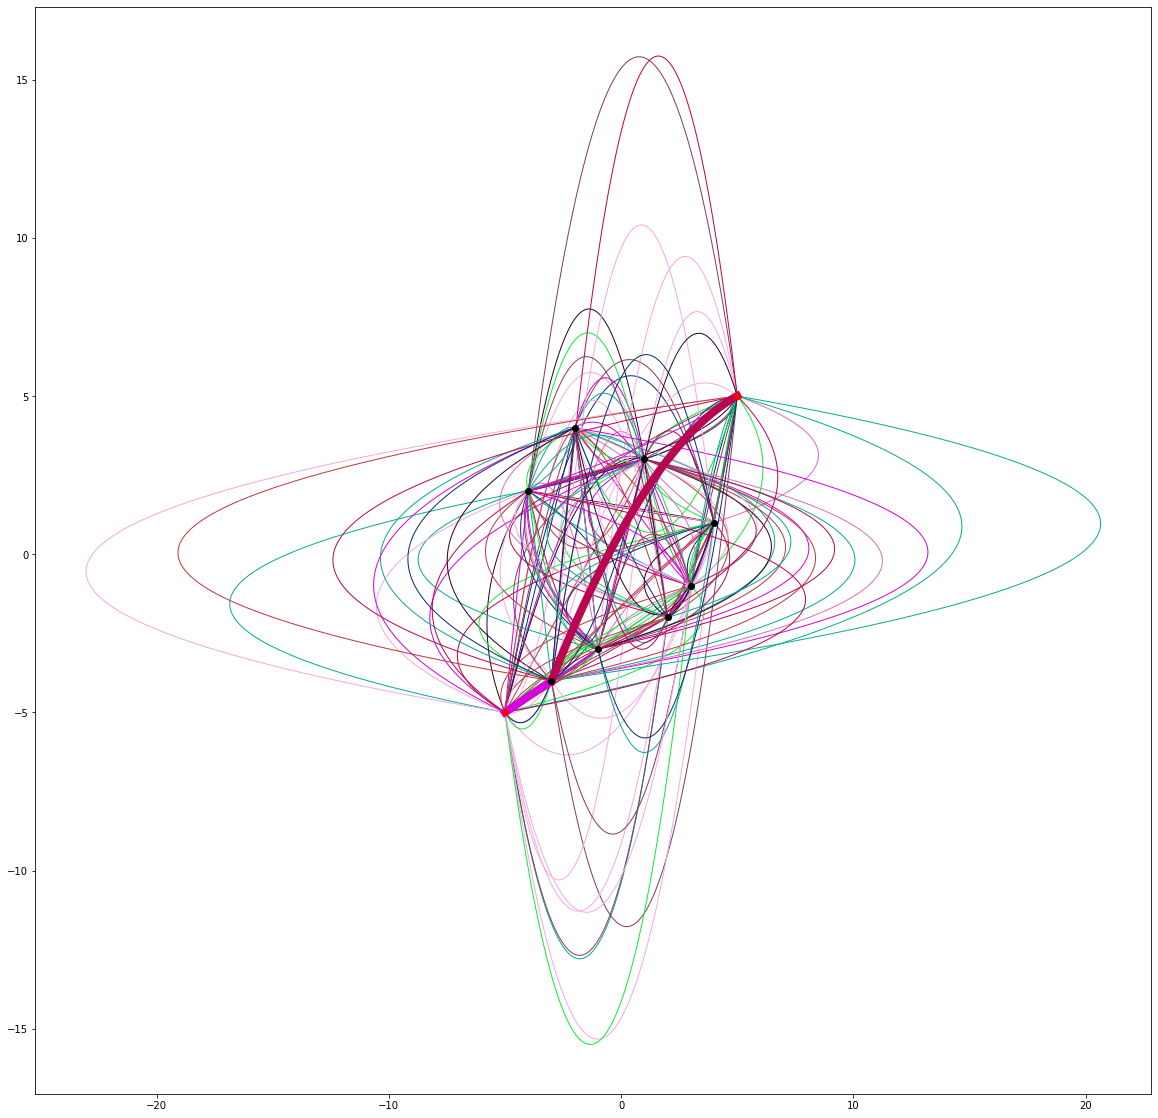

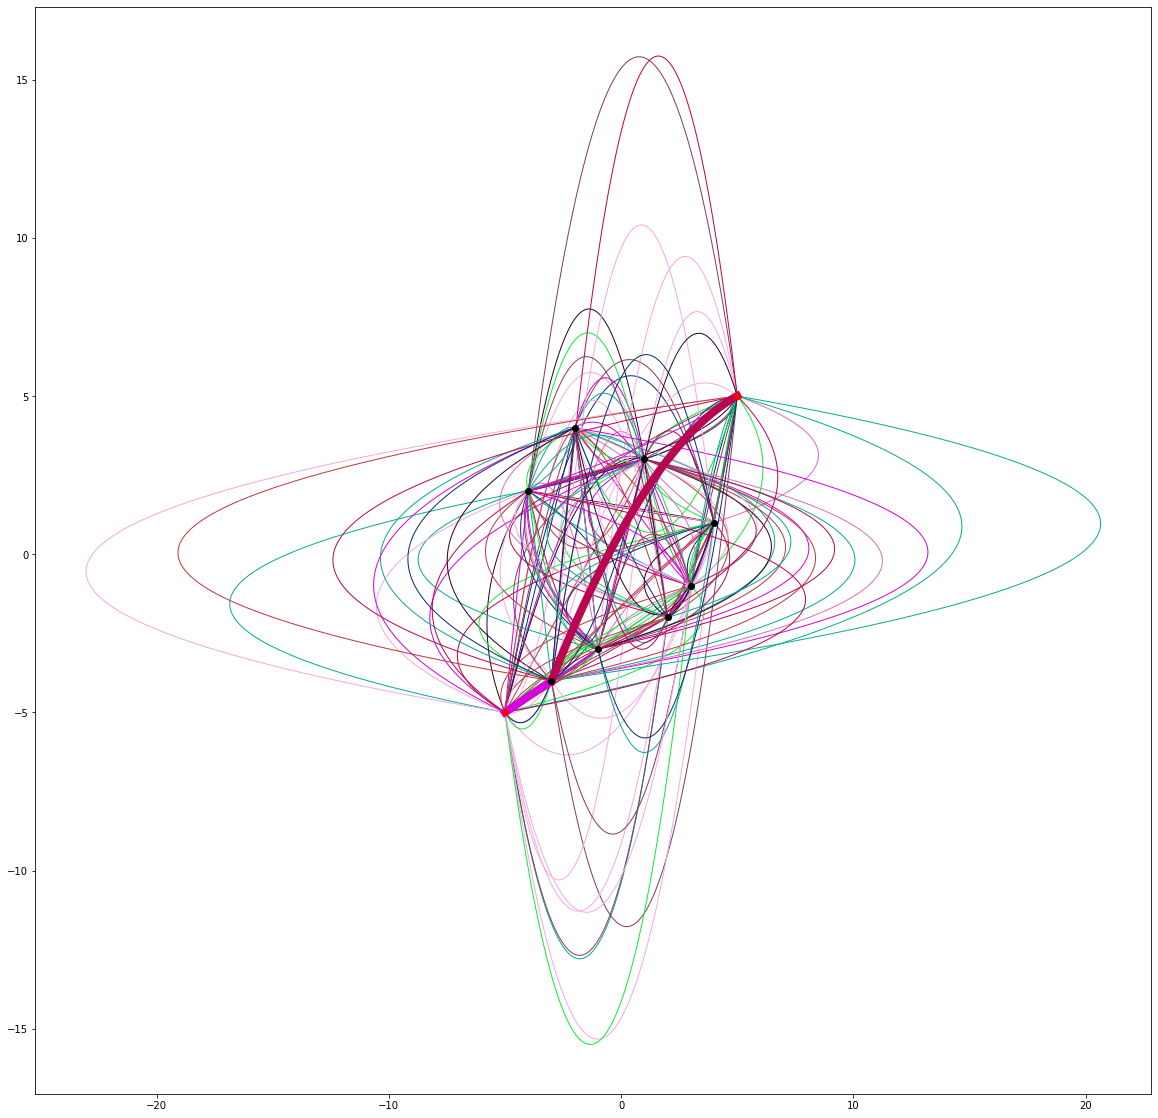

In [11]:
alpha = 1
beta = 1
rho = 0.05
Q = 1
b = 5

class Ant1(object):
    """docstring for Ant"""
    def __init__(self, graph):
        super(Ant1, self).__init__()
        self.graph = graph

    def prob(self, edges, nodes):
        p = []
        for edge in edges:
            v = edge.v
            if v == self.graph.t:
                p.append(edge.pheromone**alpha * (max_w+edge.w)**(-beta))
                continue
            cand = []
            for node in nodes:
                cand += self.graph.edges[v][node]
            if len(cand) != 0:
                min_out = min([e.w for e in cand])
            else:
                min_out = max_w
            p.append(edge.pheromone**alpha * (min_out+edge.w)**(-beta))

        p = np.array(p)/sum(p)
        # print(p)
        return p

    def move(self):
        graph = self.graph
        nodes = list(range(1,graph.N+1))
        s = graph.s
        t = graph.t
        path = []
        nodes.remove(s)
        cur_node = s

        while cur_node != t:
            cur_edges = []
            for node in nodes:
                cur_edges += graph.edges[cur_node][node]
            if len(cur_edges) == 0:
                break
            chosen_edge = np.random.choice(cur_edges, p=self.prob(cur_edges, nodes))
            path.append(chosen_edge)

            cur_node = chosen_edge.v
            nodes.remove(cur_node)

        return Path(path)

class Ant2(object):
    """docstring for Ant"""
    def __init__(self, graph):
        super(Ant2, self).__init__()
        self.graph = graph

    def prob(self, edges, domains_traveled):
        p = []
        for edge in edges:
            if edge.d in domains_traveled:
                if edge.d == domains_traveled[-1]:
                    p.append(edge.pheromone**alpha * (1)**beta)
                else:
                    p.append(edge.pheromone**alpha * (0.1)**beta)
            else:
                p.append(edge.pheromone**alpha * (0.5)**beta)
        return np.array(p)/sum(p)

    def move(self):
        graph = self.graph
        nodes = list(range(1,graph.N+1))
        s = graph.s
        t = graph.t
        path = []
        nodes.remove(s)
        cur_node = s
        domains = [-1]

        while cur_node != t:
            cur_edges = []
            for node in nodes:
                cur_edges += graph.edges[cur_node][node]
            if len(cur_edges) == 0:
                break
            chosen_edge = np.random.choice(cur_edges, p=self.prob(cur_edges, domains))
            path.append(chosen_edge)
            domains.append(chosen_edge.d)
            cur_node = chosen_edge.v
            nodes.remove(cur_node)

        return Path(path)


class Ant3(object):
    """docstring for Ant"""
    def __init__(self, graph):
        super(Ant3, self).__init__()
        self.graph = graph

    def prob(self, edges):
        p = []
        for edge in edges:
            p.append(edge.pheromone**alpha * edge.w**(-beta))
        return np.array(p)/sum(p)

    def move(self):
        graph = self.graph
        nodes = list(range(1,graph.N+1))
        s = graph.s
        t = graph.t
        path = []
        nodes.remove(s)
        cur_node = s
        
        while cur_node != t:
            cur_edges = []
            for node in nodes:
                cur_edges += graph.edges[cur_node][node]
            if len(cur_edges) == 0:
                break
            chosen_edge = np.random.choice(cur_edges, p=self.prob(cur_edges))
            path.append(chosen_edge)
            cur_node = chosen_edge.v
            nodes.remove(cur_node)
            cur_edges = []
            for node in nodes:
                cur_edges += graph.edges[cur_node][node]

        return Path(path)

def score(edges):
    domains_traveled = [-1]
    cs = 0
    length = 0
    for edge in edges:
        w, d = edge.w, edge.d
        length += w
        if d in domains_traveled and d != domains_traveled[-1]:
            cs += 1

        domains_traveled.append(d)

    return (length, cs)

class Path(object):
    """docstring for Path"""
    def __init__(self, edges):
        super(Path, self).__init__()
        self.edges = edges
        self.cost = score(edges)
        self.L = self.cost[0]+self.cost[1]

    def update_pheromone(self, best_path):
        for edge in self.edges:
            edge.pheromone += Q/self.L
            if edge in best_path.edges:
                edge.pheromone += b*Q/best_path.L
        
    def print(self):
        for edge in self.edges:
            edge.print()

def ACO(graph, num_ants=100, num_iters=20):
    ant1 = Ant1(graph)
    ant2 = Ant2(graph)
    ant3 = Ant3(graph)

    best_path = ant3.move()
    for i in range(num_iters):
        print('iter:',i)
        paths = []
        for _ in range(num_ants):
            path = ant1.move()
            if best_path.L > path.L:
                best_path = path
            paths.append(path)

#             path = ant2.move()
#             if best_path.L > path.L:
#                 best_path = path
#             paths.append(path)

            path = ant3.move()
            if best_path.L > path.L:
                best_path = path
            paths.append(path)

        for u in range(N+1):
            for v in range(N+1):
                for edge in graph.edges[u][v]:	
                    edge.pheromone = (1-rho)*edge.pheromone
        for path in paths:
            path.update_pheromone(best_path)

        print(best_path.cost)
        best_path.print()
        
        draw_graph(nodes, edges_pt, best_path, colors)
    
ACO(graph, num_ants=100, num_iters=20)